# Lab 4

In this lab, you will experience text processing and how to deal with text files.

Use the link below to download the dataset you are working on.

https://ubcca-my.sharepoint.com/:u:/g/personal/fatemeh_fard_ubc_ca/Ea0codoUmEVGon4ZiXqdHowBuLESdO824rcEj9uAH30FYg?e=q0NfCU

The dataset includes hundreds of csv files. Each one name is a name of a mobile app. In each file, you will see multiple columns, including ``content`` which is the review written by the users, ``score`` which is the score given to the app, ``thumbsUp``, ``reviewCreatedVersion`` defining on which version of the app the review is for, ``at`` which is the time and date of the review, ``replyContent`` which holds the answers from the app developers to the review, and ``repliedAt`` which is the time and date the reply is written.

For this dataset, answer the following.

1) How many files are there in the folder (in other words, how many apps)?

2) How many app reviews do we have in total?

3) What is the range of the app reviews, meaning the earliest review and the latest one? Include both date and time.

4) How many reviews are written in each month of 2021?

5) What is the frequency of the reviews written in each hour in the month of January 2021? Visualize this in a bar chart.

6) What is the average score for all apps?

7) What is the frequency of the scores for all apps? Visualize it with a bar chart.

8) What is the frequency of the thumbsUp for each reply? Visualize it.

Consider the column `content` to answer the following questions.

9) Pre-process the text by removing the following characters from the review texts: ``. , " : ; ' ) ( * ``

10) Pre-process the text by removing multiple occurrences of question marks and exclamation marks. For example, convert ``The app is super easy to work with!!!!!`` to ``The app is super easy to work with!``.

11) OPTIONAL: apply sentiment analysis on the reviews to analyze whether the positive reviews are the ones that recieve high scores and negative reviews are the ones that receive low scores. Is there any correlation between the setiment of the reviews and the `score` given by the user?

Hint: you can write the function to clean one review and then apply it on the specified column using ``apply`` function.


**Dataset licensing:**

You are not allowed to share this dataset publicly or use it for any other purpose other than this lab. This is a dataset collected by the students in my lab for their graduate thesis.

In [13]:
pip install blog


  Obtaining dependency information for pymdown-extensions>=6.* from https://files.pythonhosted.org/packages/9f/08/d34528eaafe5521449aaedd897a0422b88ac311276384b162f6a65518008/pymdown_extensions-10.7-py3-none-any.whl.metadata
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Obtaining dependency information for Markdown>=3.1.* from https://files.pythonhosted.org/packages/42/f4/f0031854de10a0bc7821ef9fca0b92ca0d7aa6fbfbf504c5473ba825e49c/Markdown-3.5.2-py3-none-any.whl.metadata
   ---------------------------------------- 0.0/250.8 kB ? eta -:--:--
   -------------------------------- ------- 204.8/250.8 kB 6.3 MB/s eta 0:00:01
   ---------------------------------------- 250.8/250.8 kB 5.1 MB/s eta 0:00:00
   ---------------------------------------- 0.0/103.9 kB ? eta -:--:--
   ---------------------------------------- 103.9/103.9 kB ? eta 0:00:00
  Created wheel for docopt: filename=docopt-0.6.2-py2.py3-none-any.whl size=13775 sha256=d

DEPRECATION: blog 1.0.1 has a non-standard dependency specifier PyYAML>=5.1.*. pip 23.3 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of blog or contact the author to suggest that they release a version with a conforming dependency specifiers. Discussion can be found at https://github.com/pypa/pip/issues/12063
DEPRECATION: blog 1.0.1 has a non-standard dependency specifier Jinja2>=2.10.*. pip 23.3 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of blog or contact the author to suggest that they release a version with a conforming dependency specifiers. Discussion can be found at https://github.com/pypa/pip/issues/12063
DEPRECATION: blog 1.0.1 has a non-standard dependency specifier Markdown>=3.1.*. pip 23.3 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of blog or contact the author to suggest that they release a version with a conforming dependency spe

In [14]:
import os
import pandas as pd
import numpy as np
import re
import glob

from datetime import datetime
import matplotlib.pyplot as plt

In [19]:
#q1
path='2.8M App Reviews - 3686 Top Paid Apps - 998.8MB on Disk'

In [20]:
from glob import glob
import os




file_paths = glob(os.path.join(path, '*.csv'))
num_files = len(file_paths)

print(num_files)


3686


In [22]:
#q2
myfiles = glob("2.8M App Reviews - 3686 Top Paid Apps - 998.8MB on Disk/*.csv")
myfiles

['2.8M App Reviews - 3686 Top Paid Apps - 998.8MB on Disk\\aa.apps.pro.dailyreflections.csv',
 '2.8M App Reviews - 3686 Top Paid Apps - 998.8MB on Disk\\abdelrahman.wifianalyzerpremium.csv',
 '2.8M App Reviews - 3686 Top Paid Apps - 998.8MB on Disk\\accky.kreved.skrwt.skrwt.csv',
 '2.8M App Reviews - 3686 Top Paid Apps - 998.8MB on Disk\\agamz.acrostics.csv',
 '2.8M App Reviews - 3686 Top Paid Apps - 998.8MB on Disk\\age.of.civilizations.jakowski.csv',
 '2.8M App Reviews - 3686 Top Paid Apps - 998.8MB on Disk\\age.of.civilizations2.jakowski.lukasz.csv',
 '2.8M App Reviews - 3686 Top Paid Apps - 998.8MB on Disk\\age.of.civilizations2.jakowski.lukasz.europe.csv',
 '2.8M App Reviews - 3686 Top Paid Apps - 998.8MB on Disk\\air.air.ExpansePremium.csv',
 '2.8M App Reviews - 3686 Top Paid Apps - 998.8MB on Disk\\air.air.FactoryBalls.csv',
 '2.8M App Reviews - 3686 Top Paid Apps - 998.8MB on Disk\\air.air.RedSunPremium.csv',
 '2.8M App Reviews - 3686 Top Paid Apps - 998.8MB on Disk\\air.air.Su

In [28]:
df = pd.DataFrame()
mylist = []  # List to store each DataFrame

for f in files:
    try:
        temp_df = pd.read_csv(f, low_memory=False)  
        mylist.append(temp_df)
    except ValueError:
        continue

In [29]:
df = pd.concat(mylist, ignore_index=True)
print(len(df))

2877020


In [30]:
#q3
df

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt
0,gp:AOqpTOG2TY9wkL3oiMjVrepN2XHT5EWKtGmxJZT8Sy_...,MinisterBeverly Williams,https://play-lh.googleusercontent.com/a-/AOh14...,Love it!,5,0,5.0,2021-01-15 08:54:37,NaN,NaN
1,gp:AOqpTOEx4qk7pnhLPfsmKhcD5zbmjepYE0lZNzzFdME...,Lisa Jean Anderson,https://play-lh.googleusercontent.com/a-/AOh14...,So awesome. Read my morning meditation anytime...,5,2,5.0,2020-12-23 05:55:25,NaN,NaN
2,gp:AOqpTOE-cYUT75NuY2T4WpNmAi5k_OzPjVSztCLBv9H...,Elizabeth Sinclair,https://play-lh.googleusercontent.com/a-/AOh14...,"Just replaced one add with another, albeit AA ...",1,7,NaN,2020-11-23 05:12:28,NaN,NaN
3,gp:AOqpTOFUhiUGHapQeqts9n-fUbJWx-hP3NkA4gfOYIF...,Beth Roberts,https://play-lh.googleusercontent.com/-gZgWA89...,Don't bother upgrading. There is zero differen...,1,24,5.0,2020-07-15 08:27:45,NaN,NaN
4,gp:AOqpTOFPJ-HpCX8SMCZF8-2Yr-bQMpcViaI41n3SYMX...,Jason Hurd,https://play-lh.googleusercontent.com/a-/AOh14...,Every time I go to share the reading it pops u...,1,2,5.0,2020-07-12 05:05:10,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
2877015,lg:AOqpTOEkwSXw4iwpwky8ke4khdh1qo_1q7LszzXD1Rl...,A Google user,https://play-lh.googleusercontent.com/EGemoI2N...,Great :) but should make screen bigger..and to...,5,2,1.0,2010-12-24 04:24:33,NaN,NaN
2877016,lg:AOqpTOEZxEzqLi6luVVRvS18cOluXZPdT9MVaYcx562...,A Google user,https://play-lh.googleusercontent.com/EGemoI2N...,"Great widget, really love it. But how I'm incr...",5,2,1.0,2010-12-23 12:47:04,NaN,NaN
2877017,lg:AOqpTOG-odYZPmrrb7ynHU5AbfAFSQgtdDuIPcKRWz2...,A Google user,https://play-lh.googleusercontent.com/EGemoI2N...,Bit too small. Also how do i get its energy up?!,3,0,1.0,2010-12-23 02:41:54,NaN,NaN
2877018,lg:AOqpTOFTlLwKoezKe3WurVdNRy_qYumaJbVRPs88S7h...,A Google user,https://play-lh.googleusercontent.com/EGemoI2N...,Fun and cute...perfect for my kids to carefor!...,5,2,1.0,2010-12-21 22:55:11,NaN,NaN


In [33]:

df['at'] = pd.to_datetime(df['at'])


earliest = df['at'].min()


latest = df['at'].max()
print(earliest)
print(latest)

2009-02-20 14:07:32
2021-02-10 05:32:18


In [34]:
#q4
data_2021=df[df['at'].dt.year == 2021]
monthly_data=data_2021.groupby(data_2021['at'].dt.month).size()
monthly_data

at
1    40238
2    11583
dtype: int64

In [35]:
#q5

selected=df[(df['at'].dt.year == 2021) & (df['at'].dt.month == 1)]
new_selected=selected.groupby(selected['at'].dt.hour).size()
new_selected

at
0     1449
1     1452
2     1384
3     1569
4     1794
5     1913
6     2057
7     2189
8     2004
9     1924
10    1861
11    1690
12    1580
13    1509
14    1544
15    1481
16    1464
17    1518
18    1681
19    1654
20    1686
21    1631
22    1614
23    1590
dtype: int64

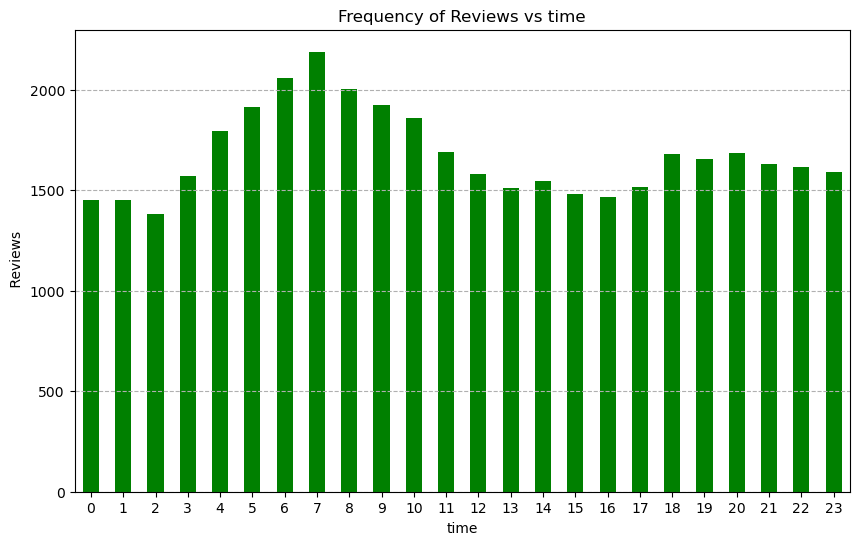

In [37]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
new_selected.plot(kind='bar', color='green')
plt.title('Frequency of Reviews vs time')
plt.xlabel('time')
plt.ylabel(' Reviews')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--')
plt.show()

In [38]:
#q6
mean_of_score= df['score'].mean()
mean_of_score

4.226761371140972

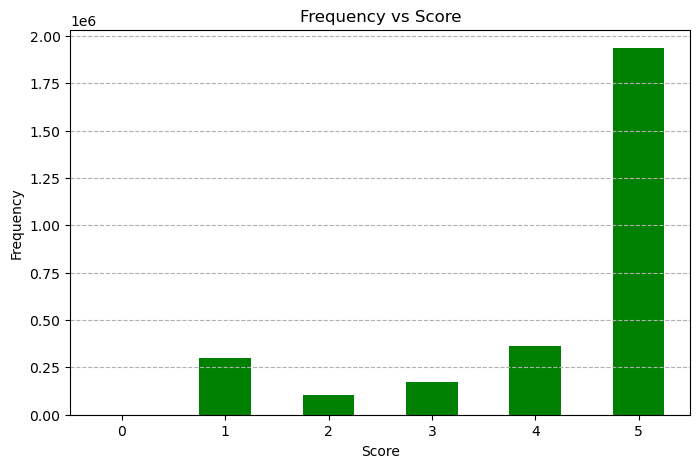

0        895
1     298103
2     106526
3     172771
4     362616
5    1936109
Name: score, dtype: int64

In [39]:
#q7
frequency = df['score'].value_counts().sort_index()


plt.figure(figsize=(8, 5))
frequency.plot(kind='bar', color='green')
plt.title('Frequency vs Score')
plt.xlabel('Score')
plt.ylabel('Frequency')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--')
plt.show()

frequency

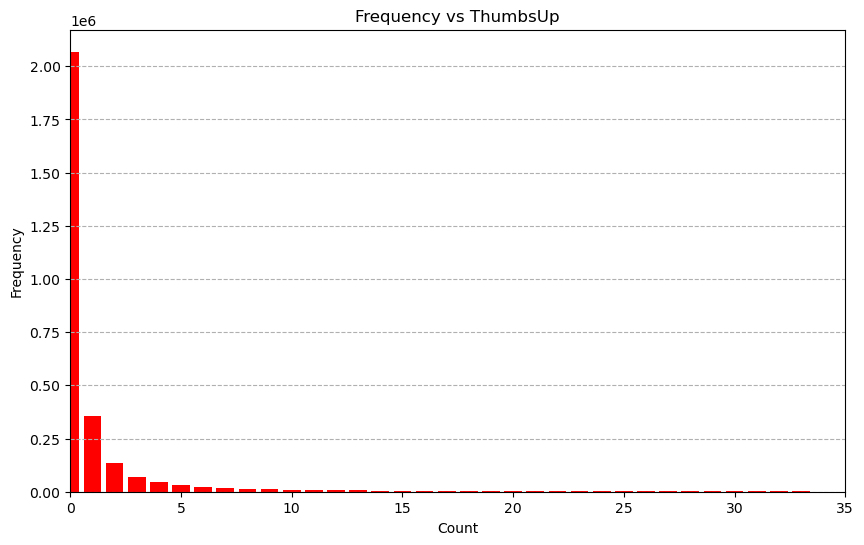

In [43]:
#q8
frequency_new = df['thumbsUpCount'].value_counts().sort_index()


plt.figure(figsize=(10, 6))
plt.bar(frequency_new.index, frequency_new.values, color='red')
plt.title('Frequency vs ThumbsUp')
plt.xlabel('Count')
plt.ylabel('Frequency')
plt.grid(axis='y', linestyle='--')

plt.xlim(0, 35)
plt.show()

In [44]:
list_to_remove = [',', '.', '"', ':', ';',  ')', '(', '*']
for i in list_to_remove:
    df.loc[:, 'content'] = df['content'].str.replace(i, '')
df

C:\Users\hexua\AppData\Local\Temp\ipykernel_2680\2354465821.py:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df.loc[:, 'content'] = df['content'].str.replace(i, '')


,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt
0,gp:AOqpTOG2TY9wkL3oiMjVrepN2XHT5EWKtGmxJZT8Sy_...,MinisterBeverly Williams,https://play-lh.googleusercontent.com/a-/AOh14...,Love it!,5,0,5.0,2021-01-15 08:54:37,NaN,NaN
1,gp:AOqpTOEx4qk7pnhLPfsmKhcD5zbmjepYE0lZNzzFdME...,Lisa Jean Anderson,https://play-lh.googleusercontent.com/a-/AOh14...,So awesome Read my morning meditation anytime ...,5,2,5.0,2020-12-23 05:55:25,NaN,NaN
2,gp:AOqpTOE-cYUT75NuY2T4WpNmAi5k_OzPjVSztCLBv9H...,Elizabeth Sinclair,https://play-lh.googleusercontent.com/a-/AOh14...,Just replaced one add with another albeit AA r...,1,7,NaN,2020-11-23 05:12:28,NaN,NaN
3,gp:AOqpTOFUhiUGHapQeqts9n-fUbJWx-hP3NkA4gfOYIF...,Beth Roberts,https://play-lh.googleusercontent.com/-gZgWA89...,Don't bother upgrading There is zero differenc...,1,24,5.0,2020-07-15 08:27:45,NaN,NaN
4,gp:AOqpTOFPJ-HpCX8SMCZF8-2Yr-bQMpcViaI41n3SYMX...,Jason Hurd,https://play-lh.googleusercontent.com/a-/AOh14...,Every time I go to share the reading it pops u...,1,2,5.0,2020-07-12 05:05:10,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
2877015,lg:AOqpTOEkwSXw4iwpwky8ke4khdh1qo_1q7LszzXD1Rl...,A Google user,https://play-lh.googleusercontent.com/EGemoI2N...,Great but should make screen biggerand to get...,5,2,1.0,2010-12-24 04:24:33,NaN,NaN
2877016,lg:AOqpTOEZxEzqLi6luVVRvS18cOluXZPdT9MVaYcx562...,A Google user,https://play-lh.googleusercontent.com/EGemoI2N...,Great widget really love it But how I'm increa...,5,2,1.0,2010-12-23 12:47:04,NaN,NaN
2877017,lg:AOqpTOG-odYZPmrrb7ynHU5AbfAFSQgtdDuIPcKRWz2...,A Google user,https://play-lh.googleusercontent.com/EGemoI2N...,Bit too small Also how do i get its energy up?!,3,0,1.0,2010-12-23 02:41:54,NaN,NaN
2877018,lg:AOqpTOFTlLwKoezKe3WurVdNRy_qYumaJbVRPs88S7h...,A Google user,https://play-lh.googleusercontent.com/EGemoI2N...,Fun and cuteperfect for my kids to carefor! En...,5,2,1.0,2010-12-21 22:55:11,NaN,NaN


In [46]:
#test
df['content'] = df['content'].str.replace(r'\?{2,}', '?', regex=True).str.replace(r'!{2,}', '!', regex=True)
final= [[100, 'MrK203????'], [55, 'Suzi!!!!'], [1000, 'Reba????']]
result = pd.DataFrame(final, columns=['ID', 'Name'])
result['Name'] = result['Name'].str.replace(r'\?{2,}', '?', regex=True).str.replace(r'!{2,}', '!', regex=True)
result

,ID,Name
0,100,MrK203?
1,55,Suzi!
2,1000,Reba?
